In [1]:
#%matplotlib notebook
import functools
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from sympy import *
init_printing()

In [2]:
theta, phi = symbols('theta, phi', real=True)

### recursive procedure of generating associated legendre polynomials
- optimized with dynamic programming

In [3]:
@functools.lru_cache(maxsize=4096)
def Pmm(m, x):
    if m <= 0:
        return Number(1)
    fact = Number(2*m - 1)
    pmm = Number(-1)**m * fact * sqrt(1-x**2) * Pmm(m-1, x)
    return pmm.simplify()

@functools.lru_cache(maxsize=4096)
def Pmmp1(m, x):
    pmmp1 = x * (2*m + 1) * Pmm(m, x)
    return pmmp1.simplify()

@functools.lru_cache(maxsize=4096)
def P(l, m, x):
    if l == m:
        return Pmm(m, x)
    if l == m+1:
        return Pmmp1(m, x)
    pll = ((2*l-1) * x * P(l-1, m, x) - (l+m-1) * P(l-2, m, x)) / (l-m)
    return pll.simplify()

### 3d real spherical harmonic functions
- optimized with dynamic programming

In [4]:
@functools.lru_cache(maxsize=4096)
def K(l, m):
    return sqrt(((2*l+1)/(4*pi))*(factorial(l-m)/factorial(l+m))).simplify()

@functools.lru_cache(maxsize=4096)
def SH(l, m, theta, phi):
    if m > 0:
        return sqrt(2)*K(l,m)*cos(m*phi)*P(l,m,cos(theta))
    elif m < 0:
        return sqrt(2)*K(l,-m)*sin(-m*phi)*P(l,-m,cos(theta))
    else:
        return K(l,m)*P(l,m,cos(theta))

### first few bands of real spherical harmonic formulas

SH(l=0,m=0)


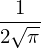

SH(l=1,m=-1)


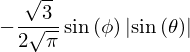

SH(l=1,m=0)


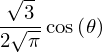

SH(l=1,m=1)


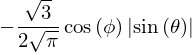

SH(l=2,m=-2)


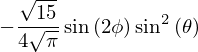

SH(l=2,m=-1)


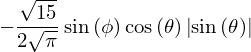

SH(l=2,m=0)


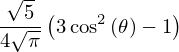

SH(l=2,m=1)


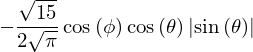

SH(l=2,m=2)


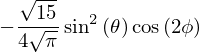

SH(l=3,m=-3)


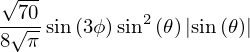

SH(l=3,m=-2)


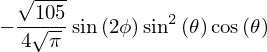

SH(l=3,m=-1)


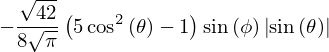

SH(l=3,m=0)


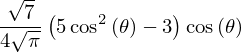

SH(l=3,m=1)


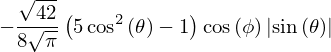

SH(l=3,m=2)


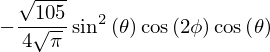

SH(l=3,m=3)


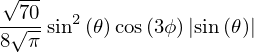

SH(l=4,m=-4)


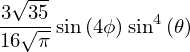

SH(l=4,m=-3)


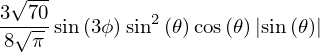

SH(l=4,m=-2)


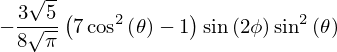

SH(l=4,m=-1)


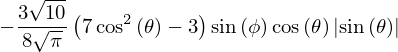

SH(l=4,m=0)


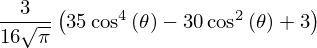

SH(l=4,m=1)


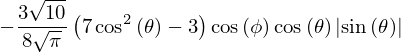

SH(l=4,m=2)


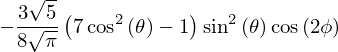

SH(l=4,m=3)


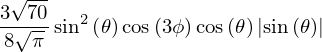

SH(l=4,m=4)


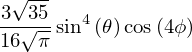

SH(l=5,m=-5)


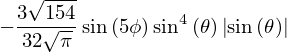

SH(l=5,m=-4)


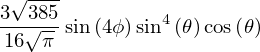

SH(l=5,m=-3)


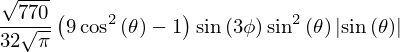

SH(l=5,m=-2)


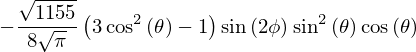

SH(l=5,m=-1)


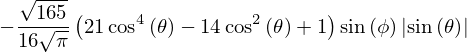

SH(l=5,m=0)


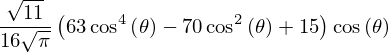

SH(l=5,m=1)


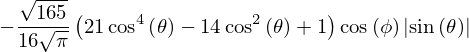

SH(l=5,m=2)


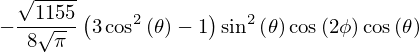

SH(l=5,m=3)


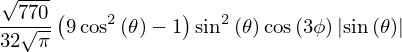

SH(l=5,m=4)


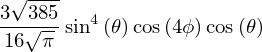

SH(l=5,m=5)


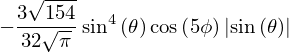

SH(l=6,m=-6)


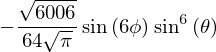

SH(l=6,m=-5)


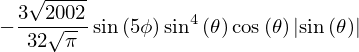

SH(l=6,m=-4)


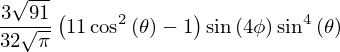

SH(l=6,m=-3)


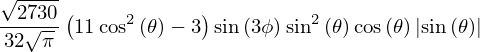

SH(l=6,m=-2)


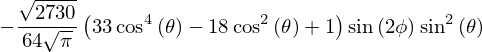

SH(l=6,m=-1)


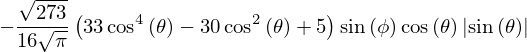

SH(l=6,m=0)


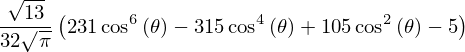

SH(l=6,m=1)


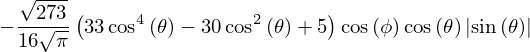

SH(l=6,m=2)


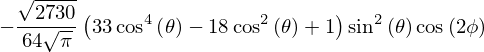

SH(l=6,m=3)


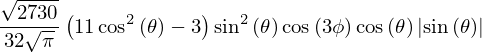

SH(l=6,m=4)


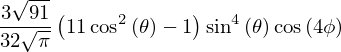

SH(l=6,m=5)


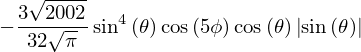

SH(l=6,m=6)


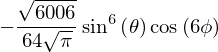

In [5]:
SHs = []
SHs_names = []
for l in range(7):
    for m in range(-l, l+1):
        SHs.append(SH(l, m, theta, phi).simplify())
        SHs_names.append(f"SH(l={l},m={m})")
        print(SHs_names[-1])
        display(SHs[-1])

In [6]:
MESH_SIZE = 50

In [7]:
theta_, phi_ = [np.linspace(0, 1, MESH_SIZE, endpoint=False) for _ in range(2)]
theta_, phi_ = np.meshgrid(theta_, phi_)
theta_, phi_ = [_ + np.random.rand(*theta_.shape)*(1/MESH_SIZE) for _ in (theta_, phi_)]
SAMPLE_MESH = 2*np.arccos(np.sqrt(1-theta_)), 2*np.pi*phi_

In [8]:
theta_, phi_ = [np.linspace(0, 1, MESH_SIZE) for _ in range(2)]
theta_, phi_ = np.pi*theta_, 2*np.pi*phi_
RENDER_MESH = np.meshgrid(theta_, phi_)

### monte carlo spherical sampling mesh

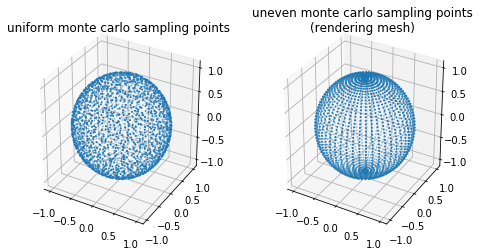

In [9]:
fig = plt.figure(figsize=(8,4))
THETA, PHI = SAMPLE_MESH
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_title('uniform monte carlo sampling points')
ax.scatter3D(X, Y, Z, s=1)
THETA, PHI = RENDER_MESH
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.set_title('uneven monte carlo sampling points\n(rendering mesh)')
ax.scatter3D(X, Y, Z, s=1)
plt.show()

### visualization of first few spherical harmonic bands
- yes, it is the orbitals of electrons if you studied physics or chemistry before

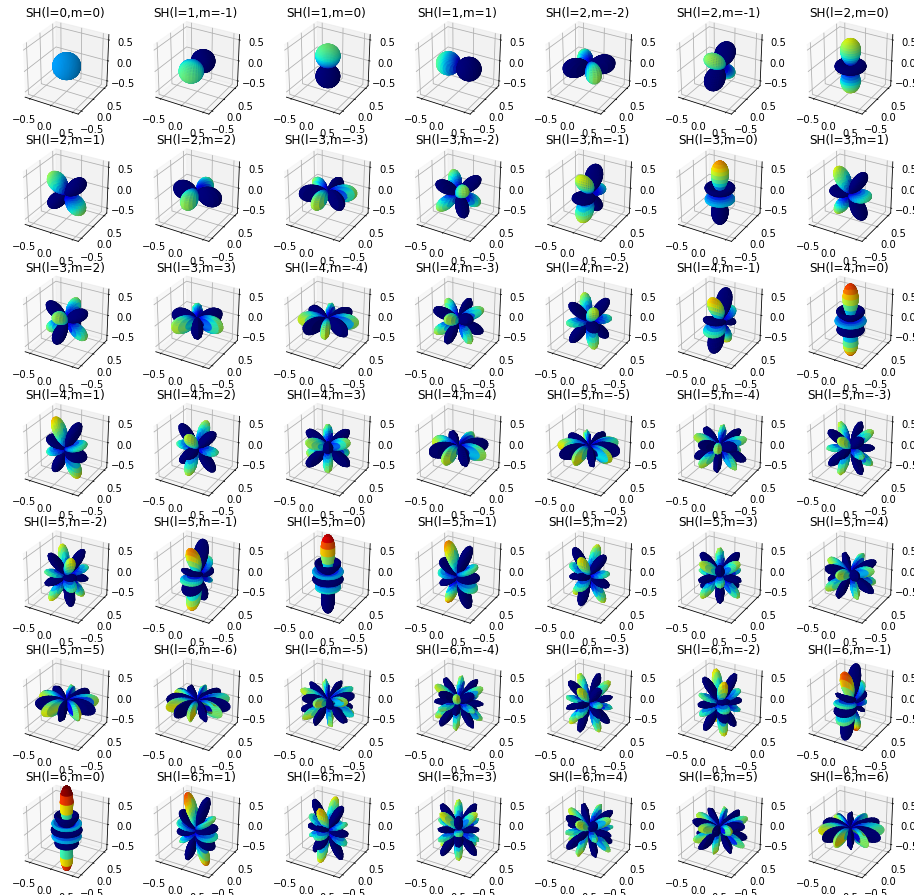

In [10]:
fig = plt.figure(figsize=(16,16))
THETA, PHI = RENDER_MESH
plot_dim = int(np.ceil(len(SHs)**0.5))
plot_lim = 0.6
for i in range(len(SHs)):
    lambda_sh = lambdify((theta,phi), SHs[i].evalf())
    R = lambda_sh(THETA, PHI) + np.zeros_like(THETA)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    ax = fig.add_subplot(plot_dim,plot_dim,i+1, projection='3d')
    ax.set_title(SHs_names[i])
    ax.set_xlim((-plot_lim,plot_lim))
    ax.set_ylim((-plot_lim,plot_lim))
    ax.set_zlim((-plot_lim,plot_lim))
    ax.plot_surface(
        abs(R)*X, abs(R)*Y, abs(R)*Z,
        rstride=1, cstride=1,
        facecolors=plt.cm.jet(R),
        linewidth=1, antialiased=True, alpha=0.75)
plt.show()

### a toy spherical model as the reconstruction target

In [11]:
def original(x, y, z):
    r = np.exp(1j*(np.sin(x*3+np.cos(y*4)+np.sin(z*5))))
    return np.real(r)

In [12]:
BANDS = 16

### reconstruction using monte carlo integration
- one of the common way to preprocess to compress lights from all direction for a point in game engine

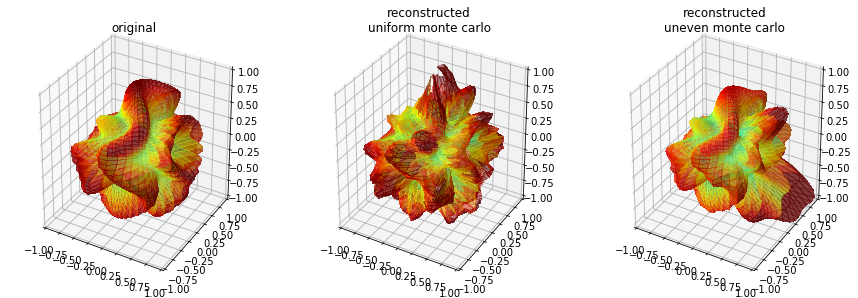

In [13]:
fig = plt.figure(figsize=(15,5))
plot_lim = 1.
THETA, PHI = RENDER_MESH
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
O = original(X,Y,Z)
ax = fig.add_subplot(1,3,1, projection='3d')
ax.set_title("original")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(O)*X, abs(O)*Y, abs(O)*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(O),
    linewidth=0, antialiased=False, alpha=0.5)
lambda_shs = []
C_uniform = []
THETA, PHI = SAMPLE_MESH
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
O = original(X,Y,Z)
for l in range(BANDS):
    for m in range(-l, l+1):
        lambda_sh = lambdify((theta,phi), SH(l,m,theta,phi).evalf())
        c = 4*np.pi * np.mean(O * lambda_sh(THETA, PHI))
        C_uniform.append(c)
        lambda_shs.append(lambda_sh)
R = np.zeros_like(THETA)
for i in range(len(lambda_shs)):
    R += C_uniform[i] * lambda_shs[i](THETA, PHI)
ax = fig.add_subplot(1,3,2, projection='3d')
ax.set_title("reconstructed\nuniform monte carlo")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(R)*X, abs(R)*Y, abs(R)*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(R),
    linewidth=0, antialiased=False, alpha=0.5)
lambda_shs = []
C_uneven = []
THETA, PHI = RENDER_MESH
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
O = original(X,Y,Z)
for l in range(BANDS):
    for m in range(-l, l+1):
        lambda_sh = lambdify((theta,phi), SH(l,m,theta,phi).evalf())
        c = 6*np.pi * np.mean(O * lambda_sh(THETA, PHI) * np.sin(THETA))
        C_uneven.append(c)
        lambda_shs.append(lambda_sh)
R = np.zeros_like(THETA)
for i in range(len(lambda_shs)):
    R += C_uneven[i] * lambda_shs[i](THETA, PHI)
ax = fig.add_subplot(1,3,3, projection='3d')
ax.set_title("reconstructed\nuneven monte carlo")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(R)*X, abs(R)*Y, abs(R)*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(R),
    linewidth=0, antialiased=False, alpha=0.5)
plt.show()

### the above method has some inconvenience
- it will only work if we sample the sphere uniformly, for example, we need to add an additional $\sin \theta$ term in the integration if we use the rendering mesh to sample the original toy model
- there is a $4 \pi$ which is a sampling point distribution depended constant in the integration step, in the uneven sampled reconstruction we have to change it to $6 \pi$

I want to get rid of them with deep learning

In [14]:
import keras

/home/marco/.virtualenvs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### a custom keras 3d real spherical harmonic layer
- it reuse the spherical harmonic generation procedure before
- it also demonstrate how to combine sympy and tensorflow together

In [15]:
class SphericalHarmonic(keras.layers.Layer):
    
    def __init__(self, units, bands=4, coeff=None, ** kwargs):
        self.units = units
        self.bands = bands
        self.__coeff_init = \
            'uniform' if coeff is None else \
            lambda shape, dtype=None: \
                keras.backend.constant(coeff, dtype=dtype, shape=shape)
        super(SphericalHarmonic, self).__init__(**kwargs)
    
    def build(self, input_shape):
        if input_shape[-1] != 2:
            raise Exception("last dimension of the input must be (theta, phi)")
        self.coeff = self.add_weight(
            shape=(1, self.units, self.bands*self.bands),
            initializer=self.__coeff_init, name='coff')
        self.__SHs = []
        for l in range(self.bands):
            for m in range(-l, l+1):
                sym_SH = SH(l, m, theta, phi)
                tf_SH = lambdify((theta, phi), sym_SH.evalf(),
                                 modules=['tensorflow','numpy'])
                self.__SHs.append(tf_SH)
        super(SphericalHarmonic, self).build(input_shape)
    
    def call(self, inputs):
        THETA, PHI = inputs[:,:,0], inputs[:,:,1]
        R = self.__SHs[0](THETA, PHI) * self.coeff[:,:,0]
        for i in range(1, len(self.__SHs)):
            R += self.__SHs[i](THETA, PHI) * self.coeff[:,:,i]
        return R
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

### the network will be trained with:
- uniform sampling points
- uneven sampling points (the rendering mesh)

In [16]:
%%time
X = X_input = keras.layers.Input((2,2))
X = SphericalHarmonic(2, bands=BANDS)(X)
M = keras.Model(X_input, X)
M.compile('adam', 'mse')
M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2, 2)              0         
_________________________________________________________________
spherical_harmonic_1 (Spheri (None, 2)                 512       
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________
CPU times: user 4.1 s, sys: 0 ns, total: 4.1 s
Wall time: 4.11 s


In [17]:
%%time
THETA, PHI = \
    np.stack([SAMPLE_MESH[0],RENDER_MESH[0]]), \
    np.stack([SAMPLE_MESH[1],RENDER_MESH[1]])
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
O = original(X,Y,Z)
M.fit(np.stack([
    np.swapaxes(np.reshape(THETA, [2,-1])[:,:], 0, 1),
    np.swapaxes(np.reshape(PHI, [2,-1])[:,:], 0, 1)], axis=-1),
    np.swapaxes(np.reshape(O, [2,-1])[:,:], 0, 1),
    batch_size=64, epochs=1000, callbacks=[
        keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=True),
        keras.callbacks.EarlyStopping(monitor='loss'),
    ])

Epoch 1/1000
2500/2500 [==============================] - 4s 1ms/step - loss: 0.5977
Epoch 2/1000
2500/2500 [==============================] - 1s 345us/step - loss: 0.5543
Epoch 3/1000
2500/2500 [==============================] - 1s 341us/step - loss: 0.5245
Epoch 4/1000
2500/2500 [==============================] - 1s 335us/step - loss: 0.4999
Epoch 5/1000
2500/2500 [==============================] - 1s 343us/step - loss: 0.4784
Epoch 6/1000
2500/2500 [==============================] - 1s 338us/step - loss: 0.4581
Epoch 7/1000
2500/2500 [==============================] - 1s 343us/step - loss: 0.4405
Epoch 8/1000
2500/2500 [==============================] - 1s 338us/step - loss: 0.4232
Epoch 9/1000
2500/2500 [==============================] - 1s 331us/step - loss: 0.4076
Epoch 10/1000
2500/2500 [==============================] - 1s 350us/step - loss: 0.3922
Epoch 11/1000
2500/2500 [==============================] - 1s 354us/step - loss: 0.3782
Epoch 12/1000
2500/2500 [==================

2500/2500 [==============================] - 1s 348us/step - loss: 0.0040
Epoch 95/1000
2500/2500 [==============================] - 1s 357us/step - loss: 0.0036
Epoch 96/1000
2500/2500 [==============================] - 1s 347us/step - loss: 0.0033
Epoch 97/1000
2500/2500 [==============================] - 1s 356us/step - loss: 0.0030
Epoch 98/1000
2500/2500 [==============================] - 1s 350us/step - loss: 0.0027
Epoch 99/1000
2500/2500 [==============================] - 1s 354us/step - loss: 0.0024
Epoch 100/1000
2500/2500 [==============================] - 1s 356us/step - loss: 0.0022
Epoch 101/1000
2500/2500 [==============================] - 1s 367us/step - loss: 0.0020
Epoch 102/1000
2500/2500 [==============================] - 1s 350us/step - loss: 0.0018
Epoch 103/1000
2500/2500 [==============================] - 1s 355us/step - loss: 0.0016
Epoch 104/1000
2500/2500 [==============================] - 1s 353us/step - loss: 0.0015
Epoch 105/1000
2500/2500 [===============

### visualizing both reconstructed toy models

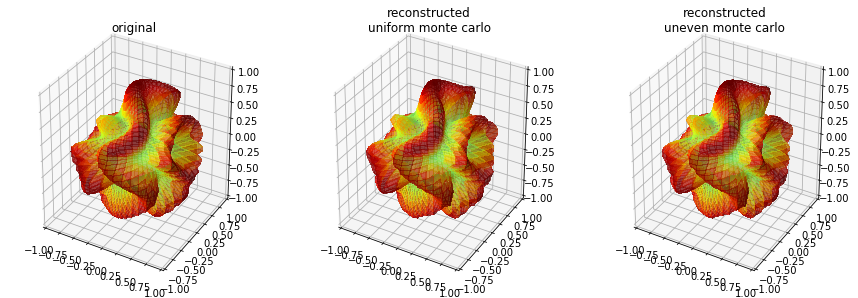

In [18]:
THETA, PHI = RENDER_MESH
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
O = original(X,Y,Z)
R = M.predict(np.repeat(np.stack([
    np.reshape(THETA, [-1])[:,np.newaxis],
    np.reshape(PHI, [-1])[:,np.newaxis]], axis=-1), 2, axis=1))
R = np.reshape(R, O.shape+(2,))
fig = plt.figure(figsize=(15,5))
plot_lim = 1.
ax = fig.add_subplot(1,3,1, projection='3d')
ax.set_title("original")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(O)*X, abs(O)*Y, abs(O)*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(O),
    linewidth=0, antialiased=False, alpha=0.5)
ax = fig.add_subplot(1,3,2, projection='3d')
ax.set_title("reconstructed\nuniform monte carlo")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(R[:,:,0])*X, abs(R[:,:,0])*Y, abs(R[:,:,0])*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(R[:,:,0]),
    linewidth=0, antialiased=False, alpha=0.5)
ax = fig.add_subplot(1,3,3, projection='3d')
ax.set_title("reconstructed\nuneven monte carlo")
ax.set_xlim((-plot_lim,plot_lim))
ax.set_ylim((-plot_lim,plot_lim))
ax.set_zlim((-plot_lim,plot_lim))
ax.plot_surface(
    abs(R[:,:,1])*X, abs(R[:,:,1])*Y, abs(R[:,:,1])*Z,
    rstride=1, cstride=1,
    facecolors=plt.cm.jet(R[:,:,1]),
    linewidth=0, antialiased=False, alpha=0.5)
plt.show()

### l2 norm of the coefficient difference between models 

In [19]:
coeff = M.get_layer(index=1).get_weights()[0]
coeff_uniform = coeff[0, 0]
coeff_uneven = coeff[0, 1]
np.linalg.norm(coeff_uniform - coeff_uneven)

0.024982372

### accelarated trainning
- the network will be initialized with the coefficient from monte carlo integration
- the trainning time will be shorten significantly

In [20]:
%%time
coeff_init = np.stack([C_uniform, C_uneven])
X = X_input = keras.layers.Input((2,2))
X = SphericalHarmonic(2, bands=BANDS, coeff=coeff_init)(X)
M = keras.Model(X_input, X)
M.compile('adam', 'mse')
M.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2, 2)              0         
_________________________________________________________________
spherical_harmonic_2 (Spheri (None, 2)                 512       
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________
CPU times: user 4.2 s, sys: 43.6 ms, total: 4.24 s
Wall time: 4.22 s


In [21]:
%%time
THETA, PHI = \
    np.stack([SAMPLE_MESH[0],RENDER_MESH[0]]), \
    np.stack([SAMPLE_MESH[1],RENDER_MESH[1]])
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
O = original(X,Y,Z)
M.fit(np.stack([
    np.swapaxes(np.reshape(THETA, [2,-1])[:,:], 0, 1),
    np.swapaxes(np.reshape(PHI, [2,-1])[:,:], 0, 1)], axis=-1),
    np.swapaxes(np.reshape(O, [2,-1])[:,:], 0, 1),
    batch_size=64, epochs=1000, callbacks=[
        keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=True),
        keras.callbacks.EarlyStopping(monitor='loss'),
    ])

Epoch 1/1000
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0038
Epoch 2/1000
2500/2500 [==============================] - 1s 363us/step - loss: 0.0010
Epoch 3/1000
2500/2500 [==============================] - 1s 347us/step - loss: 5.9898e-04
Epoch 4/1000
2500/2500 [==============================] - 1s 359us/step - loss: 4.2511e-04
Epoch 5/1000
2500/2500 [==============================] - 1s 349us/step - loss: 3.4723e-04
Epoch 6/1000
2500/2500 [==============================] - 1s 360us/step - loss: 3.1453e-04
Epoch 7/1000
2500/2500 [==============================] - 1s 353us/step - loss: 3.2229e-04
CPU times: user 12 s, sys: 548 ms, total: 12.6 s
Wall time: 11.5 s
